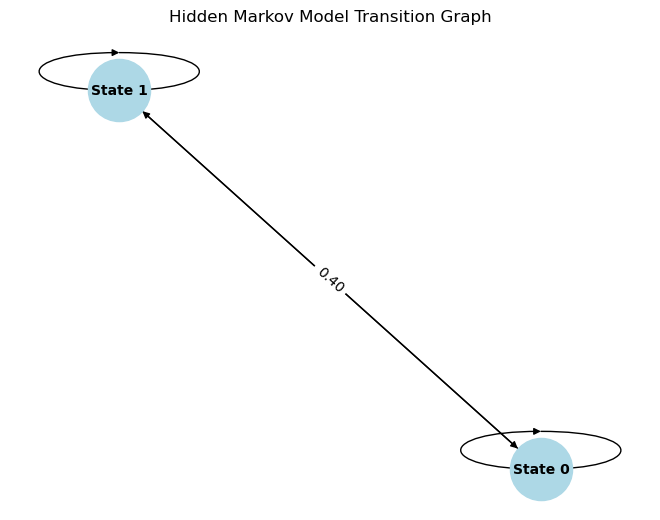

Best Path (States): [1, 0, 0]
Best Path Probability: 0.01344


In [7]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

class HMM:
    def __init__(self, transition_prob, emission_prob, initial_prob):
        self.transition_prob = transition_prob  # State transition probabilities
        self.emission_prob = emission_prob      # Emission probabilities
        self.initial_prob = initial_prob        # Initial state probabilities
        self.states = range(len(initial_prob))  # Define states for naming

    def viterbi(self, observations):
        n_states = self.transition_prob.shape[0]
        n_observations = len(observations)

        # Viterbi matrix and backpointer
        viterbi_matrix = np.zeros((n_states, n_observations))
        backpointer = np.zeros((n_states, n_observations), dtype=int)

        # Initialize base cases (t == 0)
        for s in range(n_states):
            viterbi_matrix[s, 0] = self.initial_prob[s] * self.emission_prob[s, observations[0]]

        # Recursion
        for t in range(1, n_observations):
            for s in range(n_states):
                trans_prob = viterbi_matrix[:, t - 1] * self.transition_prob[:, s]
                max_trans_prob = np.max(trans_prob)
                backpointer[s, t] = np.argmax(trans_prob)
                viterbi_matrix[s, t] = max_trans_prob * self.emission_prob[s, observations[t]]

        # Termination
        best_path_prob = np.max(viterbi_matrix[:, n_observations - 1])
        best_last_state = np.argmax(viterbi_matrix[:, n_observations - 1])

        # Backtrack to find the best path
        best_path = [best_last_state]
        for t in range(n_observations - 1, 0, -1):
            best_last_state = backpointer[best_last_state, t]
            best_path.append(best_last_state)

        best_path.reverse()

        # Visualize the graph
        self.visualize_hmm()

        return best_path, best_path_prob

    def visualize_hmm(self):
        G = nx.DiGraph()

        # Add nodes for states
        for i in self.states:
            G.add_node(f'State {i}', label=f'State {i}')

            # Add edges with transition probabilities
            for j in self.states:
                if self.transition_prob[i][j] > 0:  # Only add edges with non-zero probability
                    G.add_edge(f'State {i}', f'State {j}', weight=self.transition_prob[i][j])

        # Draw the graph
        pos = nx.spring_layout(G)  # Positioning of nodes
        labels = nx.get_edge_attributes(G, 'weight')

        nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')
        nx.draw_networkx_edge_labels(G, pos, edge_labels={edge: f'{weight:.2f}' for edge, weight in labels.items()})

        plt.title("Hidden Markov Model Transition Graph")
        plt.axis('off')  # Hide axes
        plt.show()

# Define your transition, emission, and initial probabilities
transition_prob = np.array([[0.7, 0.3],
                             [0.4, 0.6]])

emission_prob = np.array([[0.1, 0.4, 0.5],  # For State 0
                           [0.6, 0.3, 0.1]])  # For State 1

initial_prob = np.array([0.6, 0.4])  # Initial probabilities for State 0 and State 1

# Create an HMM instance
hmm = HMM(transition_prob, emission_prob, initial_prob)

# Example sequence of observations (e.g., Walking, Shopping, Cleaning)
observations = [0, 1, 2]  # Indices of the observed events

# Use Viterbi to find the best path of hidden states
best_path, best_path_prob = hmm.viterbi(observations)
print("Best Path (States):", best_path)
print("Best Path Probability:", best_path_prob)

In [8]:
pip install hmmlearn

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for hmmlearn from https://files.pythonhosted.org/packages/c8/5f/65b892737fed694b23a753b516cd851d21963abd33ea86123723f6279987/hmmlearn-0.3.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/127.0 kB ? eta -:--:--
   -------------------------------------- - 122.9/127.0 kB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 127.0/127.0 kB 3.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


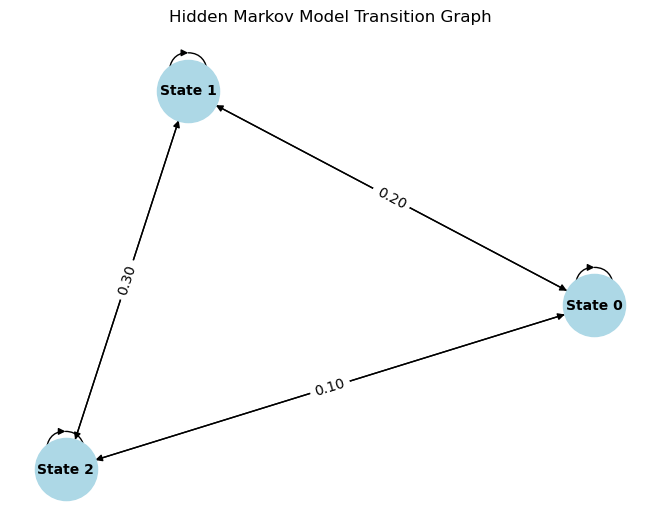

Best Path (States): [0, 0, 0]
Best Path Probability: 0.00375


In [10]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

class HMM:
    def __init__(self, transition_prob, emission_prob, initial_prob):
        self.transition_prob = transition_prob  # State transition probabilities
        self.emission_prob = emission_prob      # Emission probabilities
        self.initial_prob = initial_prob          # Initial state probabilities
        self.states = range(len(initial_prob))    # Define states for naming

    def viterbi(self, observations):
        n_states = self.transition_prob.shape[0]
        n_observations = len(observations)

        # Viterbi matrix and backpointer
        viterbi_matrix = np.zeros((n_states, n_observations))
        backpointer = np.zeros((n_states, n_observations), dtype=int)

        # Initialize base cases (t == 0)
        for s in range(n_states):
            viterbi_matrix[s, 0] = self.initial_prob[s] * self.emission_prob[s, observations[0]]

        # Recursion
        for t in range(1, n_observations):
            for s in range(n_states):
                trans_prob = viterbi_matrix[:, t - 1] * self.transition_prob[:, s]
                max_trans_prob = np.max(trans_prob)
                backpointer[s, t] = np.argmax(trans_prob)
                viterbi_matrix[s, t] = max_trans_prob * self.emission_prob[s, observations[t]]

        # Termination
        best_path_prob = np.max(viterbi_matrix[:, n_observations - 1])
        best_last_state = np.argmax(viterbi_matrix[:, n_observations - 1])

        # Backtrack to find the best path
        best_path = [best_last_state]
        for t in range(n_observations - 1, 0, -1):
            best_last_state = backpointer[best_last_state, t]
            best_path.append(best_last_state)

        best_path.reverse()

        # Visualize the graph
        self.visualize_hmm()

        return best_path, best_path_prob

    def visualize_hmm(self):
        G = nx.DiGraph()

        # Add nodes for states
        for i in self.states:
            G.add_node(f'State {i}', label=f'State {i}')

            # Add edges with transition probabilities
            for j in self.states:
                if self.transition_prob[i][j] > 0:  # Only add edges with non-zero probability
                    G.add_edge(f'State {i}', f'State {j}', weight=self.transition_prob[i][j])

        # Draw the graph
        pos = nx.spring_layout(G)  # Positioning of nodes
        labels = nx.get_edge_attributes(G, 'weight')

        nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')
        nx.draw_networkx_edge_labels(G, pos, edge_labels={edge: f'{weight:.2f}' for edge, weight in labels.items()})

        plt.title("Hidden Markov Model Transition Graph")
        plt.axis('off')  # Hide axes
        plt.show()

# Define your transition, emission, and initial probabilities for 3 states
transition_prob = np.array([[0.5, 0.3, 0.2],
                             [0.2, 0.5, 0.3],
                             [0.1, 0.3, 0.6]])

emission_prob = np.array([[0.2, 0.5, 0.3],  # For State 0
                           [0.3, 0.4, 0.3],  # For State 1
                           [0.4, 0.4, 0.2]]) # For State 2

initial_prob = np.array([0.5, 0.3, 0.2])  # Initial probabilities for State 0, State 1, and State 2

# Create an HMM instance
hmm = HMM(transition_prob, emission_prob, initial_prob)

# Example sequence of observations (0, 1, 2 can represent different observable events)
observations = [0, 1, 2]  # Indices of the observed events

# Use Viterbi to find the best path of hidden states
best_path, best_path_prob = hmm.viterbi(observations)
print("Best Path (States):", best_path)
print("Best Path Probability:", best_path_prob)